Big data analysis with PySpark

Make sure you install PySpark library from Anaconda prompt (windows) or terminal (Mac) using the following command:

conda install -c conda-forge pyspark

and then run the following commands in your terminal (Mac) or Anaconda prompt (windows):

set PYSPARK_DRIVER_PYTHON=jupyter
set PYSPARK_DRIVER_PYTHON_OPTS='notebook'


When you done, run the following test code to make sure PySpark works, if you don't get any errors, you are good to go!


In [1]:
# Big Data Analysis with PySpark
# test code (only run this code after you install PySpark and Set the parameters in Anaconda Prompt or Terminal

import pyspark
sc = pyspark.SparkContext()
some_numbers = [1,2,3,4,5,6,7,8,9,10]
my_first_rdd = sc.parallelize(some_numbers)
my_first_rdd.glom().collect()

[[], [1], [2], [3], [4], [5], [], [6], [7], [8], [9], [10]]

In this section you will dive deeper into the Spark Core API or Spark RDD API. You will not only learn by example how to write code using this API, but you will also learn about important properties of RDDs and Spark itself. Let's start by importing PySpark - a package that enables you to use Spark APIs in Python.


In [8]:
# how to import PySpark
import pyspark


In [9]:
# Let's create a Spark cluster's connection
sc = pyspark.SparkContext()

SparkContext is the primary point of entry for Spark capabilities. A SparkContext represents a Spark cluster’s connection that is useful in building RDDs and broadcast variables on the cluster. It enables your Spark application to connect to the Spark Cluster using Resource Manager. After creating the SparkContext, you can use it to create RDDs, broadcast variables, and accumulators, as well as access Spark services and perform jobs. All of this can be done until SparkContext is terminated. 

Now that we have our Spark session initialized on the sc object, we are ready to create RDDs. There are two ways to create an RDD and have a Spark partition and distribute data across the cluster. Let's look at the first one - the parallelize method (usually used for small to medium size datasets):

In [3]:
# Let's create an RDD containing a small list with integers for elements:

some_numbers = [1,2,3,4,5,6,7,8,9,10]
my_first_rdd = sc.parallelize(some_numbers)
print(my_first_rdd)


ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287


The parallelize() method in PySpark is used to create an RDD (Resilient Distributed Dataset) from a list or any other iterable collection in Python. This method is particularly useful for testing and small datasets as it allows you to quickly create an RDD without reading data from external storage. The second method to create an RDD and have a Spark partition is read from external storage. This method involves creating an RDD by reading data from external storage systems. This is the common method used for handling large datasets.

So what happened here? Spark took our list of integers and broke it down into several chunks, called Partitions. Each of these partitions can be operated on independently from each other by Executors, enabling Spark to "divide and conquer" and perform computations on your data in parallel.

The output message gives us valuable information about RDD. 

ParallelCollectionRDD: This indicates the type of RDD. In PySpark, ParallelCollectionRDD is an RDD that is created by parallelizing a local collection (like a list or an array) into an RDD.

32: This number typically represents a unique identifier for the RDD within the context of the Spark application. It's an internal ID used by Spark to track the RDD.

ReadRDDFromFile: refers to an internal method used by Spark when handling data read from local collections or files.

PythonRDD.scala: This specifies the source file in the Spark codebase where the relevant class or method is defined. PythonRDD is a class that handles RDD operations in the context of Python, part of PySpark's internals.

287: This indicates the line number in the PythonRDD.scala file where the operation to create this RDD was invoked or defined. This is useful for debugging purposes and understanding the internals of Spark.


In [4]:
# Let's see how many partitions Spark broke our list of numbers into
my_first_rdd.getNumPartitions()


12

getNumPartitions() method returns the number of partitions created by Spark to parallelize your program.

In [5]:
#Let's try to collect the actual data from cluster!

my_first_rdd.glom().collect()

[[], [1], [2], [3], [4], [5], [], [6], [7], [8], [9], [10]]

In [6]:
#Let's set the number of partions to 10
my_first_rdd_repartitioned = my_first_rdd.repartition(10)
my_first_rdd_repartitioned.getNumPartitions()


10

Using the time library, we can measure the time required to complete the tasks and optimize the number of partitions when using PySpark. For collecting the above data from Spark cluster, let’s measure the time:

In [7]:
# Measure the time of collecting data using time library

import time
start_time = time.time()  # Record start time

my_first_rdd.glom().collect()

end_time = time.time()  # Record end time

parallel_time = end_time - start_time
print("Parallel Runtime:", parallel_time, "seconds")


Parallel Runtime: 9.390958547592163 seconds


Exercise #1:

Change the number of partitions and see how the time required for completing this parallel task will vary with the number of partitions. Think about the trend you observe and try to explain the trend.

In [9]:
# Exercise 1 solution:


start_time = time.time()  # Record start time

my_first_rdd_repartitioned = my_first_rdd.repartition(5)
my_first_rdd.glom().collect()

end_time = time.time()  # Record end time

parallel_time = end_time - start_time
print("Parallel Runtime:", parallel_time, "seconds")

Parallel Runtime: 9.738492727279663 seconds


In [10]:
# Our first meaningful transformation to our RDD: add 1 to each element

my_first_rdd_repartitioned.map(lambda element : element+1)


PythonRDD[20] at RDD at PythonRDD.scala:53

In [11]:
# The collect() method brings the contents of an RDD from the cluster back to the driver

my_first_rdd_repartitioned.collect()


[9, 5, 6, 7, 3, 10, 1, 2, 4, 8]

The numbers may be shuffled, but this is still our list of integers from 1 to 10... we had applied a transformation to our RDD, which created another RDD, but we had no way to refer to this new RDD!

To summarize: there are two types of RDD operations: transformations, which yield a new RDD, and actions, which return a value. 

In [12]:
# RDDs are immutable! Our transformation actually created another RDD we had no way to refer to on the Driver!

my_second_rdd = my_first_rdd.map(lambda element : element+1)

my_second_rdd.collect()


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

By creating new RDDs with each Transformation, Spark actually provides a type of fault-tolerance! It records these transformations, so if ever an entire node or an Executor inside a node fails, Spark can immediately recompute your RDDs and your work isn't lost.

In [13]:
# Spark preserves RDD lineage to automatically recompute them if they are lost!

my_second_rdd.toDebugString()


b'(12) PythonRDD[21] at collect at C:\\Users\\yemon\\AppData\\Local\\Temp\\ipykernel_31516\\3473384859.py:5 []\n |   ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:287 []'

Breakdown of the Output
b': The b prefix indicates that the string is a byte string. This can happen if the output was encoded in bytes. It's typically seen in Python 3 when dealing with binary data.

(12): This number represents the number of partitions in the RDD. Partitions are subsets of the data that Spark processes in parallel. Here, the RDD has 12 partitions.

PythonRDD[33]: This indicates the type and unique ID of the RDD. PythonRDD suggests this RDD was created or transformed using a Python function. The ID [33] is a unique identifier for this RDD.

at collect at C:\\Users\\yemon\\AppData\\Local\\Temp\\ipykernel_34836\\3473384859.py This shows where the collect action was called on the RDD. The path points to the file and line number in your local environment where this action was invoked.

The output indicates the following sequence of events for the RDD:

ParallelCollectionRDD[32]: An RDD was created by parallelizing a local collection. This is typically done using sc.parallelize().

PythonRDD[33]: This RDD is derived from ParallelCollectionRDD[32] and is transformed using a Python function.

collect action: The collect action was called on PythonRDD[33], triggering the computation to return the RDD's elements to the driver.


In spark, dependencies in the RDDs are logged in as a graph. In simpler words , every step is part of lineage. By calling the toDebugString method you are essentially asking to get this lineage graph(aka chain of every individual step that happened i.e type of RDD created and method used to create it) to be displayed. The code my_second_rdd.toDebugString() is used in PySpark to get a detailed, human-readable description of an RDD's lineage. This method is particularly useful for understanding how an RDD was constructed, what transformations were applied, and where it sits in the overall computation graph.



Now wait a minute... if Spark creates RDDs at every Transformation and Spark keeps things in memory... won't you quickly run out of memory by applying Transformations to RDDs?

The answer is: no! Spark performs "Lazy-Evaluation". This means all Spark does is record your transformations in a directed acrlyc graph (DAG) without actually computing anything or using up any extra memory until an Action is called on an RDD!

Let's get a feeling of this concept by applying a long chain of Transformations to an RDD and timing it.


In [14]:
# Spark performs Lazy-Evaluation: No transformation
#actually gets computed until an "action" is called on an RDD

%time my_third_rdd = my_first_rdd_repartitioned.map(lambda element : element+1).\
filter(lambda element : element % 2 ==0).map(lambda element : element+2)


CPU times: total: 31.2 ms
Wall time: 997 µs


It ran almost instantly! This code snippet performs a series of transformations on an existing RDD (my_first_rdd_repartitioned) and measures the execution time of these operations using the %time magic command (which is available in Jupyter notebooks and IPython environments). Filter method is a new transformation here. This transformation filters the RDD, keeping only the elements that satisfy the condition element % 2 == 0 (i.e., the element is even). The last map transformation applies another lambda function to each remaining element of the RDD, adding 2 to each even element.

Now let's call an Action on this RDD and time it:

In [15]:
# The "reduce" method is an "action". For a complete list of actions,
#see: https://spark.apache.org/docs/latest/rdd-programming-guide.html#actions

%time my_third_rdd.reduce(lambda a,b : a+b)


CPU times: total: 15.6 ms
Wall time: 4.03 s


40

The reduce function is an action in Spark that aggregates the elements of an RDD using a specified binary function. It takes a function that operates on two elements of the RDD at a time and returns a single aggregated result. The function provided here is a lambda function lambda a, b: a + b, which sums two elements. This lambda function takes two arguments a and b and returns their sum a + b. The reduce operation proceeds by combining elements of the RDD pairwise until only a single result remains.

And here is some good news for those of you who can't get used to the "lambda function" syntax. This also works just fine:

In [16]:
def add_numbers(a,b):
	return a+b

%time my_third_rdd.reduce(add_numbers)


CPU times: total: 0 ns
Wall time: 4.12 s


40

RDDs are a pretty powerful concept and if you take anything home from this workshop let it be this: RDDs are a simple way of performing Data Parallelism. In other words, you can write your code almost the exact same way you would in a serial program (i.e., not parallel) and the "parallel" part simply means your code will run against different chunks of your data at the same time. All you need to do most of the time is wrap your usual code with one or more RDD API methods and be aware of the nature of the elements in your Partitions, so you pick the right method. Once you've done that, Spark takes care of performing Data Parallelism for you! Here is a slightly more difficult example - let's use Spark to multiply each element of a numpy array by a random number.

What makes this more difficult? Now we are doing Data Parallelism not on a native Python object like before (a list), but on an object defined by a non-native library: numpy.

We start by creating this object: a 1-d array of 100 elements.


In [17]:
import numpy as np

an_object = np.linspace(0,1,100)

an_object

my_new_rdd = sc.parallelize(an_object)


Now you might be tempted to do like we did before and just do what you would do on your own workstation without Spark:

In [18]:
my_new_rdd.map(lambda element : element * np.random.rand()).collect()

[0.0,
 0.00826538313486573,
 0.00034108213014716,
 0.026812767794947498,
 0.007235315937175272,
 0.029109312117678907,
 0.04107054629664143,
 0.012208289992239559,
 0.057203165983461174,
 0.015475122047686862,
 0.077854976309951,
 0.0823808728287687,
 0.04470566094074968,
 0.1048481517951939,
 0.12861563859490485,
 0.060642030363338706,
 0.0600329696776155,
 0.027772788037093744,
 0.12521546532414496,
 0.14024540621533166,
 0.03968850460762085,
 0.0835821717985252,
 0.21339468099723988,
 0.10119247585378977,
 0.1754062285719478,
 0.06624657490667155,
 0.18516873514657733,
 0.24917583306224958,
 0.23350067589227638,
 0.132689720946891,
 0.1495203919866341,
 0.18763646831729097,
 0.3176066531714394,
 0.04519275598044707,
 0.16286996963412897,
 0.08846320582767389,
 0.12999915830152123,
 0.22621506508602446,
 0.14696706910942336,
 0.35885119948622957,
 0.05333791691843269,
 0.2489544032213848,
 0.09133781481247998,
 0.15452764564314295,
 0.39157564837712616,
 0.060955751711326285,
 0.4242

This should have failed if you are running on a Cluster (as opposed to running Spark on a single computer). Why? Well, you imported the numpy library on the Driver, but you are asking the Executors to use it... you need to tell the Executors to import numpy too!

In [19]:
#This code defines a function that multiplies a single element by a random number
#and then applies this function to an RDD using the map transformation.def multiply_by_random(x):

def multiply_by_random(x):
	import numpy as np
    
	return x * np.random.rand()
    
#This last line multiplies the input element x by a random number generated by np.random.rand().
# np.random.rand() returns a random float in the range [0.0, 1.0).

my_new_rdd.map(lambda element : multiply_by_random(element)).collect()


[0.0,
 0.00812202160953058,
 0.009888215613162834,
 0.022715492630669448,
 0.008659391685772757,
 0.03448168602599533,
 0.027560703653753585,
 0.016443101228011472,
 0.018815385184661183,
 0.0876795285736796,
 0.05417207548205051,
 0.041080454767260834,
 0.11426797302917423,
 0.048251363091528394,
 0.11467419587443911,
 0.04053628403353266,
 0.14315245912768274,
 0.03198870335061044,
 0.09897123735442913,
 0.13158943507542234,
 0.057051633321580565,
 0.07462888455352489,
 0.17398915898689493,
 0.09718231748087326,
 0.035949209765678815,
 0.24998969499875554,
 0.24283422445191372,
 0.2411938810633507,
 0.14492573438244377,
 0.1372208308889884,
 0.14542315429596428,
 0.032982778206575324,
 0.0009364628095138021,
 0.3289465565571908,
 0.15724359192730175,
 0.08573953761873887,
 0.3231652712873657,
 0.08366498697149989,
 0.0010921911465743566,
 0.007830278207876781,
 0.2857534928188237,
 0.0025939463236285044,
 0.35460982735908814,
 0.4029073294340829,
 0.1592006709400899,
 0.0616179786199

map() method is a transformation that applies a function to each element of the RDD.
The lambda function lambda element : multiply_by_random(element) takes each element of the RDD and applies the multiply_by_random function to it.

Alright! This seems to have worked. but is it the best way to go about doing this? Remember, the map method applies whatever function you pass to it to every single element of each partition!

Does that mean we are importing numpy 100 times in this example? Yes, it does.

This is a good way to proceed into another very useful Transformation in the RDD API:


In [20]:
def partition_multiply_by_random(x):
	import numpy as np

    # The next line creates a new list by iterating over each element in the partition x.
    #For each element, it multiplies the element by a random number generated by np.random.rand().
    # np.random.rand() returns a random float in the range [0.0, 1.0).
    
	output = [element * np.random.rand() for element in x]
    
	return output

#The next lambda function lambda partition : partition_multiply_by_random(partition) takes a partition
# and then applies the partition_multiply_by_random function to it.

my_new_rdd.mapPartitions\
(lambda partition : partition_multiply_by_random(partition)).\
collect()


[0.0,
 0.0006420913277973483,
 0.005413505116012295,
 0.0036835932297477076,
 0.035147944004453,
 0.0058057735724303,
 0.05877923542836736,
 0.03160158096465221,
 0.06967279128993041,
 0.054005501820067504,
 0.017327105353854295,
 0.011777305579379135,
 0.007499235990222014,
 0.11631479878530236,
 0.11545088682086957,
 0.14982690433642673,
 0.12243675426075418,
 0.0472953133941451,
 0.07113057542906155,
 0.04185325846479681,
 0.019715014391753015,
 0.039586059528881674,
 0.0448821952736188,
 0.22254719044491159,
 0.03550950773879934,
 0.00027961650804080127,
 0.15531602331420274,
 0.1850270874273684,
 0.11497642534749183,
 0.2865182960559578,
 0.2215599719104101,
 0.25909242656991643,
 0.23859557893595518,
 0.1215007225029264,
 0.32993533209760273,
 0.3277326839953978,
 0.03808260073704731,
 0.1365252776019683,
 0.10146061591735347,
 0.2753102081792687,
 0.026516793413697056,
 0.057696444671271475,
 0.2345593688181751,
 0.1495624430585001,
 0.2519548151138189,
 0.4449523276760417,
 0.0

This code defines a function that multiplies elements in a partition by random numbers and then applies this function to an RDD using the mapPartitions transformation. Instead of applying a function to each element individually (like map), mapPartitions allows you to work with a whole partition at once. This can be more efficient for certain operations. 

The mapPartition method applies whatever function you pass to it to each Partition, but with one caveat: whatever your function does, it must iterate through the elements of the input Partition. So in practice, this method also applies your function to the elements of a Partition, but it allows you more flexibility to do things like importing libraries only once per partition... or anything else that you don't need done repeatedly for each element of a partition.

If your code imports libraries, you need to make sure they are installed on every node of your cluster! Generally, that means asking your system administrator to do it for you. 

Exercise 2.2 
Create two random numpy arrays each with 1000 elements. Use PySpark, write a parallel code to calculate the summation of each element of these arrays (we need just one single value as the total sum). Compare the computational speed of parallel code with a simple summation code without parallelization. 

Suggestion: For parallel part, you can use reduce() method action which can aggregates the elements of an RDD, you can combine it with a specific lambda function to perform the summation for you.


In [14]:
## Exercise 2.2 Solution (non-parallel code)
# Create random NumPy arrays
import time 
import numpy as np
start_time_np = time.time()  # Record start time
arr1 = np.random.rand(1000)
arr2 = np.random.rand(1000)

# Non-parallel summation
sum_non_parallel = np.sum(arr1) + np.sum(arr2)

print("Sum (Non-Parallel):", sum_non_parallel)
end_time_np = time.time()  # Record end time

non_parallel_time = end_time_np - start_time_np
print("Non-Parallel Runtime:", non_parallel_time, "seconds")

Sum (Non-Parallel): 980.4381053007403
Non-Parallel Runtime: 0.0 seconds


In [16]:
#Exercise 2.2 solution (parallel code)
import time
start_time = time.time()  # Record start time

# Simulate creating random NumPy arrays on Spark workers
data = [arr1, arr2]
#print(data)
  # Create Spark RDD from data
rdd = sc.parallelize(data)

#define sum function
def p_sum(x):
		
	return sum(x)


# This line will perform a parallel sum of elements in an RDD

sum_parallel = rdd.map(p_sum).reduce(lambda a, b: a + b)

print("Sum (Parallel - PySpark):", sum_parallel)

end_time = time.time()  # Record end time

parallel_time = end_time - start_time
print("Parallel Runtime:", parallel_time, "seconds")

Sum (Parallel - PySpark): 980.4381053007411
Parallel Runtime: 9.7750883102417 seconds


Explanation of sum_parallel = rdd.map(p_sum).reduce(lambda a, b: a + b): 

The reduce action aggregates the elements of the RDD using a specified binary operator, in this case, a lambda function that adds two values. Here, lambda a, b: a + b is a simple function that takes two arguments (a and b) and returns their sum. This function is used by reduce() to combine elements of the RDD.

Initial RDD: rdd contains the original data that you want to process and sum.
map(p_sum): This applies the p_sum function to each element of rdd. The result is a new RDD where each element has been transformed by the p_sum function.
reduce(lambda a, b: a + b): The reduce function takes the transformed RDD and applies the lambda function lambda a, b: a + b to aggregate the elements. The lambda function is repeatedly applied to pairs of elements until a single aggregated value (the sum of all elements) is produced.This reduction operation is performed in parallel across the distributed RDD, taking advantage of Spark's distributed computing capabilities.

Directed Acyclic Graphs

Now let's look at what Spark is actually doing when Executors perform work on subsets of your dataset in parallel. In the previous section we discussed how RDDs provide a way for the user to work with data scattered across nodes of a cluster transparently, without caring where data points are physically located. Executors then operate somewhat independently over separate chunks of your overall dataset, called Partitions. We had also previously mentioned that the role of the Driver Process is to translate your code into a representation that allows Spark to divide up tasks among multiple executors. That representation was called a Directed Acyclic Graph (DAG) and we will discuss how that ties together with RDDs to enable Spark to fulfill its promise of providing a user-friendly distributed computing platform.

The first API we showed you how to use in this lesson was the Spark Core API. Also known as the RDD API, it is at the base of all other Spark APIs. Spark Core is essentially made up of a set of fundamental operations geared towards parallelizing or vectorizing arbitrary work that you want done over a given dataset. These fundamental operations can be stacked, chained, or otherwise composed into very complex sequences of steps of computations to be done over a dataset. Unlike "regular programming" though, all these fundamental operations are functions, which can only take other functions as their arguments. The RDD API is a functional programming framework.

To illustrate these ideas, let's have a look at what a "Word Count" program looks like in Spark:


In [5]:
#Word count program using PySpark!
import pyspark
from pyspark import SparkContext

# Initialize SparkContext
sc = SparkContext("local", "WordCountApp")

# Read input file
input_file = sc.textFile("test.txt", minPartitions=12)


# Process data: split lines into words, map each word to a (word, 1) pair, and reduce by key to count occurrences
word_counts = input_file.flatMap(lambda line: line.split()) \
                        .map(lambda word: (word, 1)) \
                        .reduceByKey(lambda a, b: a + b)

# Collect the result and print each word with its count
for word, count in word_counts.collect():
    print(f"{word}: {count}")

# Stop SparkContext
sc.stop()

words: 1
test: 1
Spark: 1
ADI: 1
is: 1
document: 1
This: 1
a: 2
therefore: 1
an: 1
to: 1
example: 1
Therefore: 2
RDD: 1
includes: 1
few: 2


Code explanation:

sc = SparkContext("local", "WordCountApp"): Here, Local is the deployment mode passed to the SparkContext constructor. It specifies that you're running Spark in local mode. Local mode means all the Spark computations will happen on the same machine where your Python script is running, using a single thread. This isn't ideal for large datasets as it doesn't leverage the potential parallelism of multiple cores or a distributed cluster. "WordCountApp": This is the application name assigned to your Spark application. It's used for identification and logging purposes. You can choose any descriptive name for your application.

input_file = sc.textFile("test.txt"): This reads a text file named test.txt into an RDD (Resilient Distributed Dataset) named input_file. Each line in the text file becomes an element in the RDD.

word_counts = input_file.flatMap(lambda line: line.split()).map(lambda word: (word, 1))               .reduceByKey(lambda a, b: a + b)
                        
This code processes the input data in three main steps:

* flatMap(lambda line: line.split()): flatMap Transformation: This splits each line into words. Lambda Function: lambda line: line.split() splits each line into a list of words. Output: The result is a flattened RDD where each word from each line is an individual element.

* map(lambda word: (word, 1)): map Transformation: This maps each word to a key-value pair (word, 1). Lambda Function: lambda word: (word, 1) creates a tuple for each word, with the word itself as the key and 1 as the value. Output: The result is an RDD of tuples where each word is paired with the number 1.

* reduceByKey(lambda a, b: a + b): reduceByKey Transformation: This reduces the tuples by their key (word) by summing the values. Lambda Function: lambda a, b: a + b adds the values of tuples with the same key. Output: The result is an RDD of tuples where each word is paired with its total count.

You could very naturally describe what the code is doing like this:

* Read in the text file
* Go through all lines of text and break them down into a list of all words in the file 
* take each word on the list and put it in a tuple along with the number 1
* group together the tuples that contain the same word and sum all the number 1s

Here is a cleaner way of writing down the exact same description:


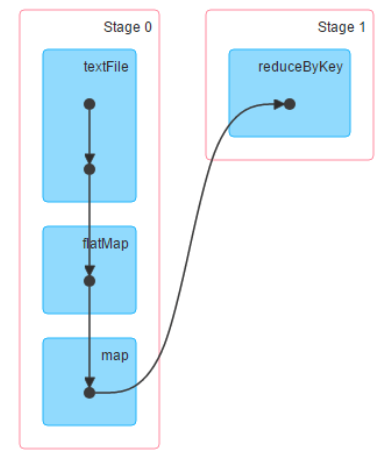

When we visualize the sequence of steps in this way, a few things that were hidden come to the forefront. Notice how the computation is broken down into two stages. That simply means the operations on the second stage can only start being carried out once the last operation of the first stage is finished being computed. In other words, the second stage depends on the results of the first being completely computed for it to be able to start.

But what about the operations inside the first stage? Remember Spark will apply these operations to separate partitions of your dataset in parallel. That means that as soon as one of these operations is done being computed over a partition of the data, the next operation can start on that same partition regardless of what is happening with the other partitions! You don't necessarily need to wait for FlatMap to be applied to the entire dataset before you start computing the map! So even though you see the operations in sequence on that diagram, in practice different partitions, in practice Spark may be assigning different computation tasks over different partitions of a dataset within different Executors!

This diagram that allows Spark to "decide" which operations can be carried out in parallel and which ones must wait for the results of preceding operations is called a Directed Acyclic Graph, and it is exactly the representation that the Driver Process will create based on your code!


Exercise 2.3
Download the following text file:

GOT.txt

Write a parallel program using PySpark to count the number of times word “Westeros” has been used in the text file. Use 6 to 18 partitions to parallel the search and Find out how long it took for the program to run.

Suggestion: to use a specific number of partitions, you can specify minPartitions=X as an extra argument when reading the input file. For example for 4 partitions: input_file = sc.textFile("GOT.txt", minPartitions=4)



In [3]:
#Word count program using PySpark to count the word "king" in the text
import pyspark
from pyspark import SparkContext
import time
start_time = time.time()  # Record start time
   
# Initialize SparkContext
sc = SparkContext("local", "WordCountApp")

# Read input file
input_file = sc.textFile("GOT.txt", minPartitions=4)


# Process data: split lines into words, map each word to a (word, 1) pair, and reduce by key to count occurrences
word_counts = input_file.flatMap(lambda line: line.split()) \
                        .map(lambda word: (word, 1)) \
                        .reduceByKey(lambda a, b: a + b)

print("number of partitions:", input_file.getNumPartitions())
# Collect the result and print each word with its count

for word, count in word_counts.collect():
    if word == 'Westeros': 
        print(f"{word}: {count}")
    
# Stop SparkContext
sc.stop()
end_time = time.time()  # Record end time

parallel_time = end_time - start_time
print("Parallel Runtime:", parallel_time, "seconds")

number of partitions: 4
Westeros: 4
Parallel Runtime: 8.105057001113892 seconds


In the next session, we will learn how to use Spark Sessions instead of Spark context and also we will start to work with Pandas on Spark API to analyze large dataframes.